In [1]:
import sys

import respy as rp
import numpy as np

sys.path.insert(0, "python")
from auxiliary import plot_observed_choices  # noqa: E402
from auxiliary import plot_time_preference  # noqa: E402
from auxiliary import plot_policy_forecast  # noqa: E402

# Structural microeconometrics

**Computational modeling in economics**

* provide learning opportunities
* assess importance of competing mechanisms
* predict the effects of public policies

**Eckstein-Keane-Wolpin (EKW) models}**

* understanding individual decisions 
    * human capital investment
    * savings and retirement
* predicting effects of policies
    * welfare programs
    * tax schedules
  

**Components**

* economic model
* mathematical formulation
* calibration procedure

## Economic model

**Decision problem**
\begin{align*}\begin{array}{ll}
t = 1, .., T& \text{decision period} \\
s_t\in S & \text{state}  \\
a_t\in A & \text{action} \\
a_t(s_t) & \text{decision rule} \\
r_t(s_t, a_t) & \text{immediate reward}\\
\end{array}\end{align*}

<img src="material/fig-timing-events.png" width="700" >

\begin{align*}\begin{array}{ll}
\pi = (a^\pi_1(s_1), .., a^\pi_T(s_T)) & \text{policy}\\
\delta & \text{discount factor} \\
p_t(s_t, a_t) & \text{conditional distribution}
\end{array}\end{align*}

**Individual's objective**
\begin{align*}
\max_{\pi \in\Pi} E_{s_1}^\pi\left[\left.\sum^{T}_{t = 1}  \delta^{t - 1} r_t(s_t, a^\pi_t(s_t))\,\right\vert\,\mathcal{I}_1\,\right]
\end{align*}

## Mathematical formulation

**Policy evaluation**
\begin{align*}
  v^\pi_t(s_t) \equiv E_{s_t}^\pi\left[\left.\sum^{T - t}_{j = 0}  \delta^j\, r_{t + j}(s_{t + j}, a^\pi_{t + j}(s_{t + j})) \,\right\vert\,\mathcal{I}_t\,\right]\\
\end{align*}

Inductive scheme
\begin{align*}
v^\pi_t(s_t) = r_t(s_t,  a^\pi_t(s_t)) + \delta\,E^\pi_{s_t} \left[\left.v^\pi_{t + 1}(s_{t + 1})  \,\right\vert\,\mathcal{I}_t\,\right]
\end{align*}

**Optimality equations**
\begin{align*}
v^{\pi^*}_t(s_t)  & = \max_{a_t \in A}\bigg\{ r_t(s_t, a_t) + \delta\, E^{\pi^*}_{s_t} \left[\left.v^{\pi^*}_{t + 1}(s_{t + 1})\,\right\vert\,\mathcal{I}_t\,\right] \bigg\}
\end{align*}

<img src="material/fig-backward-induction.png" width="700" >

## Calibration procedure


**Data**
\begin{align*}
\mathcal{D} = \{a_{it}, x_{it}, r_{it}: i = 1, ... , N; t = 1, ... , T_i\}\\
\end{align*}

**State variables}**

* $s_t = (x_t, \epsilon_t)$
    * $x_t$ observed
    * $\epsilon_t$ unobserved

**Procedures**

* likelihood-based
\begin{align*}
  \hat{\theta} \equiv argmax_{\theta \in \Theta} \prod^N_{i= 1} \prod^{T_i}_{t= 1}\, p_{it}(a_{it}, r_{it} \mid x_{it}, \theta)
\end{align*}
* simulation-based
\begin{align*}
    \hat{\theta} \equiv argmin_{\theta \in \Theta} (M_D - M_S(\theta))' W (M_D - M_S(\theta))
\end{align*}

## Example

**Seminal paper**

* Keane, M. P., & Wolpin, K. I. (1994). The solution and estimation of discrete choice dynamic programming models by simulation and interpolation: Monte Carlo evidence. Review of Economics and Statistics, 76 (4), 648–672.


**Model of occupational choice**

* 1,000 individuals starting at age 16
* life cycle histories
    * school attendance
    * occupation-specific work status
* wages

**Labor market**
\begin{align*}
  & \\
  r_t(s_t, 1) =  w_{1t} = \exp\{& \underbrace{\alpha_{10}}_{\text{endowment}} + \underbrace{\alpha_{11} g_t}_{\text{schooling}} + \underbrace{\alpha_{12}e_{1t} + \alpha_{13}e^2_{1t}}_{\text{own experience}} \\
              & + \underbrace{\alpha_{14}e_{2t} + \alpha_{15}e^2_{2t}}_{\text{other experience}} + \underbrace{\epsilon_{1t}}_{\text{shock}}\}
  \end{align*}

**Schooling**

\begin{align*}
& \\
r_t(s_t, 3) = & \underbrace{\beta_0}_{\text{taste}} - \underbrace{\beta_1 I[\,g_t \geq 12\,]}_{\text{direct cost}} - \underbrace{\beta_2 I[\,a_{t - 1} \neq 3\,]}_{\text{reenrollment effort}} + \underbrace{\epsilon_{3t}}_{\text{shock}} \\
\end{align*}

**Home**
\begin{align*}
& \\
r_t(s_t, 4) = & \underbrace{\gamma_0}_{\text{taste}} + \underbrace{\epsilon_{4t}}_{\text{shock}}
\end{align*}

**State space**
\begin{align*}
	s_t = \{g_t,e_{1t},e_{2t},a_{t - 1},\epsilon_{1t},\epsilon_{2t},\epsilon_{3t},\epsilon_{4t}\}
\end{align*}


**Transitions**

* observed state variables
\begin{align*}
    e_{1,t+1} &= e_{1t} + I[\,a_t = 1\,]  \\
    e_{2,t+1} &= e_{2t} + I[\,a_t = 2\,]  \\
    g_{t+1}   &= g_{t\phantom{2}}    +  I[\,a_t = 3\,]
\end{align*}
* unobserved state variables
\begin{align*}
\{\epsilon_{1t},\epsilon_{2t},\epsilon_{3t},\epsilon_{4t}\} \sim N(0, \Sigma)
\end{align*}


In [2]:
params, options = rp.get_example_model("kw_94_two", with_data=False)

How is the economy parametrized?

In [3]:
params.head()

value                                      comment
category name                                                             
delta    delta         0.9500                              discount factor
wage_a   constant      9.2100                          log of rental price
         exp_edu       0.0400    return to an additional year of schooling
         exp_a         0.0330             return to same sector experience
         exp_a_square -0.0005  return to same sector, quadratic experience

How are the options set?

In [4]:
options

{'estimation_draws': 200,
 'estimation_seed': 500,
 'estimation_tau': 500,
 'interpolation_points': -1,
 'n_periods': 40,
 'simulation_agents': 1000,
 'simulation_seed': 132,
 'solution_draws': 500,
 'solution_seed': 456,
 'monte_carlo_sequence': 'random',
 'core_state_space_filters': ["period > 0 and exp_{i} == period and lagged_choice_1 != '{i}'",
  "period > 0 and exp_a + exp_b + exp_edu == period and lagged_choice_1 == '{j}'",
  "period > 0 and lagged_choice_1 == 'edu' and exp_edu == 0",
  "lagged_choice_1 == '{k}' and exp_{k} == 0",
  "period == 0 and lagged_choice_1 == '{k}'"],
 'covariates': {'constant': '1',
  'exp_a_square': 'exp_a ** 2',
  'exp_b_square': 'exp_b ** 2',
  'at_least_twelve_exp_edu': 'exp_edu >= 12',
  'not_edu_last_period': "lagged_choice_1 != 'edu'"}}

We can now simulate a dataset and look at the individual decisions.

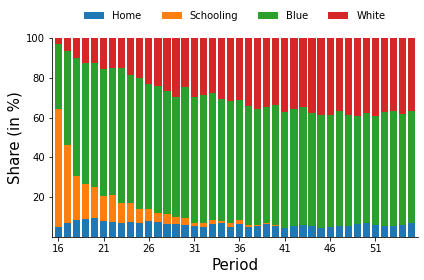

In [5]:
simulate_func = rp.get_simulate_func(params, options)
plot_observed_choices(simulate_func(params))

### Mechanisms

In [6]:
def time_preference_wrapper_kw_94(simulate_func, params, value):
    policy_params = params.copy()
    policy_params.loc[("delta", "delta"), "value"] = value
    policy_df = simulate_func(policy_params)

    edu = policy_df.groupby("Identifier")["Experience_Edu"].max().mean()

    return edu

Now we can iterate over a grid of discount factors.

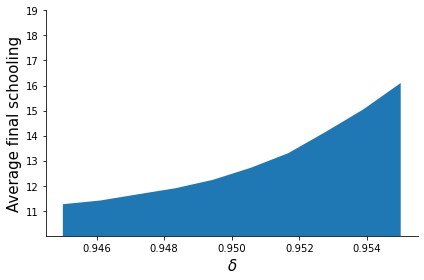

In [7]:
deltas = np.linspace(0.945, 0.955, 10)
edu_level = list()

for i, delta in enumerate(deltas):
    stat = time_preference_wrapper_kw_94(simulate_func, params, delta)
    edu_level.append(stat)

plot_time_preference(deltas, edu_level)

### Policy forecast

In [8]:
def tuition_policy_wrapper_kw_94(simulate_func, params, tuition_subsidy):
    policy_params = params.copy()
    policy_params.loc[("nonpec_edu", "at_least_twelve_exp_edu"), "value"] += tuition_subsidy
    policy_df = simulate_func(policy_params)

    edu = policy_df.groupby("Identifier")["Experience_Edu"].max().mean()

    return edu

Now we can iterate over a grid of tuition subsidies.

In [ ]:
subsidies = np.linspace(0, 1500, num=10, dtype=int, endpoint=True)
edu_level = list()

for i, subsidy in enumerate(subsidies):
    stat = tuition_policy_wrapper_kw_94(simulate_func, params, subsidy)
    edu_level.append(stat)

plot_policy_forecast(subsidies, edu_level)